# Rekursive Definition eines Binärbaums

Wir führen als erstes die Grundlegende Datenstruktur ein. Wir repräsentieren einen Baum als Knoten ```Node``` mit jeweils einem linken und rechten Unterbaum. Der leere Baum wird duch ```None``` repräsentiert.

In [91]:
class Node:
    def __init__(self, item, left = None, right = None):
        self.item = item
        self.left = left
        self.right = right

### Visualisierung mit Graphviz

Der folgende Code kann für die Visualisierung von Bäumen verwendet werden. Es ist nicht wichtig, dass Sie die Details von dieser Methode verstehen. Zusammengefasst kann man sagen, dass diese Methode den Baum pre-order traversiert und dabei die Knoten und Kanten zeichnet. 

In [92]:
from graphviz import Graph
def plotTree(node):
    dot = Graph(comment='Tree')
    _plotTree(node, dot)
    return dot

def _plotTree(node, dot):
    
    if node == None:
        return 
 
    dot.node(str(node), node.item)
    if node.left != None:
        dot.node(str(node.left), str(node.left.item))
        dot.edge(str(node), str(node.left))
    if node.right != None:
        dot.node(str(node.right), str(node.right.item))
        dot.edge(str(node), str(node.right))
    _plotTree(node.left, dot)
    _plotTree(node.right, dot)
    

## Bäume konstruieren

Es ist einfach, sich aus einzeilnen Teilbäumen einen komplexeren Baum zusammenzubauen

In [93]:
tree = Node("root", 
            Node("l",
                 Node("ll"), 
                 Node("lr")
            ),
            Node("r", 
                 Node("rl"), 
                 Node("rr")
            )
       )
                         

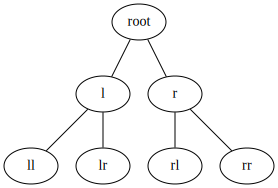

In [97]:
display(plotTree(tree))

#### Übung

Kreieren und visualisieren Sie einige Bäume

### Rekursive Operationen

Bäume sind rekursive Datenstrukturen. Dies können wir für viele Operationen ausnutzen, indem wir das Problem auf die entsprechenden Unterbaum zurückführen. Beispielhaft sehen wir hier, wie wir die Methoden ```size``` und ```height``` implementieren können, die für einen gegebenen Baum die Anzahl Knoten, respektive die Höhe berechnet. 

In [70]:
def size(node):
    pass

In [99]:
def height(node):
    pass

#### Übung

Implementieren Sie die zwei Methoden ```size``` und ```height```

### Traversierungsarten

Genau wie eine Liste, kann ein Baum als Sequenz von Elementen interpretiert werden. Dir Reihenfolge dieser Sequenz ist aber nicht eindeutig, sondern hängt davon ab, wie der Baum traversiert wird. 

### Depth-first traversal 

Eine Möglichkeit die Bäume zu traversieren ist indem wir zuerst in die Tiefe gehen.
Wir unterscheiden hier zwischen preorder, postorder und inorder traversal, je nachdem ob der Wurzelknoten am Anfang, dazwischen oder am Ende ausgegeben wird.

In [59]:
def printTreeInorder(t):
    if (t == None):
        return
    else:
        printTreeInorder(t.left)
        print(t.item)
        printTreeInorder(t.right)

In [60]:
printTreeInorder(tree)

ll
l
lr
root
rl
r
rr


In [61]:
def printTreePreorder(t):
    if (t == None):
        return
    else:
        print(t.item)
        printTreePreorder(t.left)        
        printTreePreorder(t.right)

In [62]:
printTreePreorder(tree)

root
l
ll
lr
r
rl
rr


In [63]:
def printTreePostorder(t):
    if (t == None):
        return
    else:
        printTreePostorder(t.left)        
        printTreePostorder(t.right)
        print(t.item)

In [95]:
printTreePostorder(tree)

ll
lr
l
rl
rr
r
root


## Breadth-First-Traversal

Manchmal wollen wir den Baum aber auch Ebene für Ebene ausgeben. Dies ist etwas komplizierter, da wir in gewissem Sinne gegen die "natürliche Ordnung" der Datenstruktur programmieren. 

In [88]:
from collections import deque
def breadthFirstTraversal(node):
    queue = deque([])
    if node != None:
        queue.appendleft(node)
    
    while len(queue) > 0:
        current = queue.pop()
        print(current.item)
        if current.left != None: 
            queue.appendleft(current.left)
        if current.right != None:
            queue.appendleft(current.right)
    
    

In [89]:
breadthFirstTraversal(tree)

root
l
r
ll
lr
rl
rr
